In [ ]:
!nvidia-smi

Sat Jan 13 05:49:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Training

In [ ]:
%cd {HOME}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="44Wy17Vv1dCAshyjCOPY")
project = rf.workspace("fyp-zivpu").project("final-year-project-3i39b")
dataset = project.version(5).download("yolov8")

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installatio

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Final-Year-Project-5 in yolov8:: 100%|██████████| 12222/12222 [00:01<00:00, 8862.08it/s] 


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 216MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/Final-Year-Project-5/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

epoch = 100, image size = 640

---

Time taken = 4.741 hours

System RAM = 8.7/51.0 GB

GPU RAM = 7.7/15.0 GB

Disk = 27.2/166.8 GB

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1704875030.cf2e2116f59c.2116.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch27630.jpg   val_batch2_labels.jpg
P_curve.png					    train_batch27631.jpg   val_batch2_pred.jpg
PR_curve.png					    train_batch27632.jpg   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


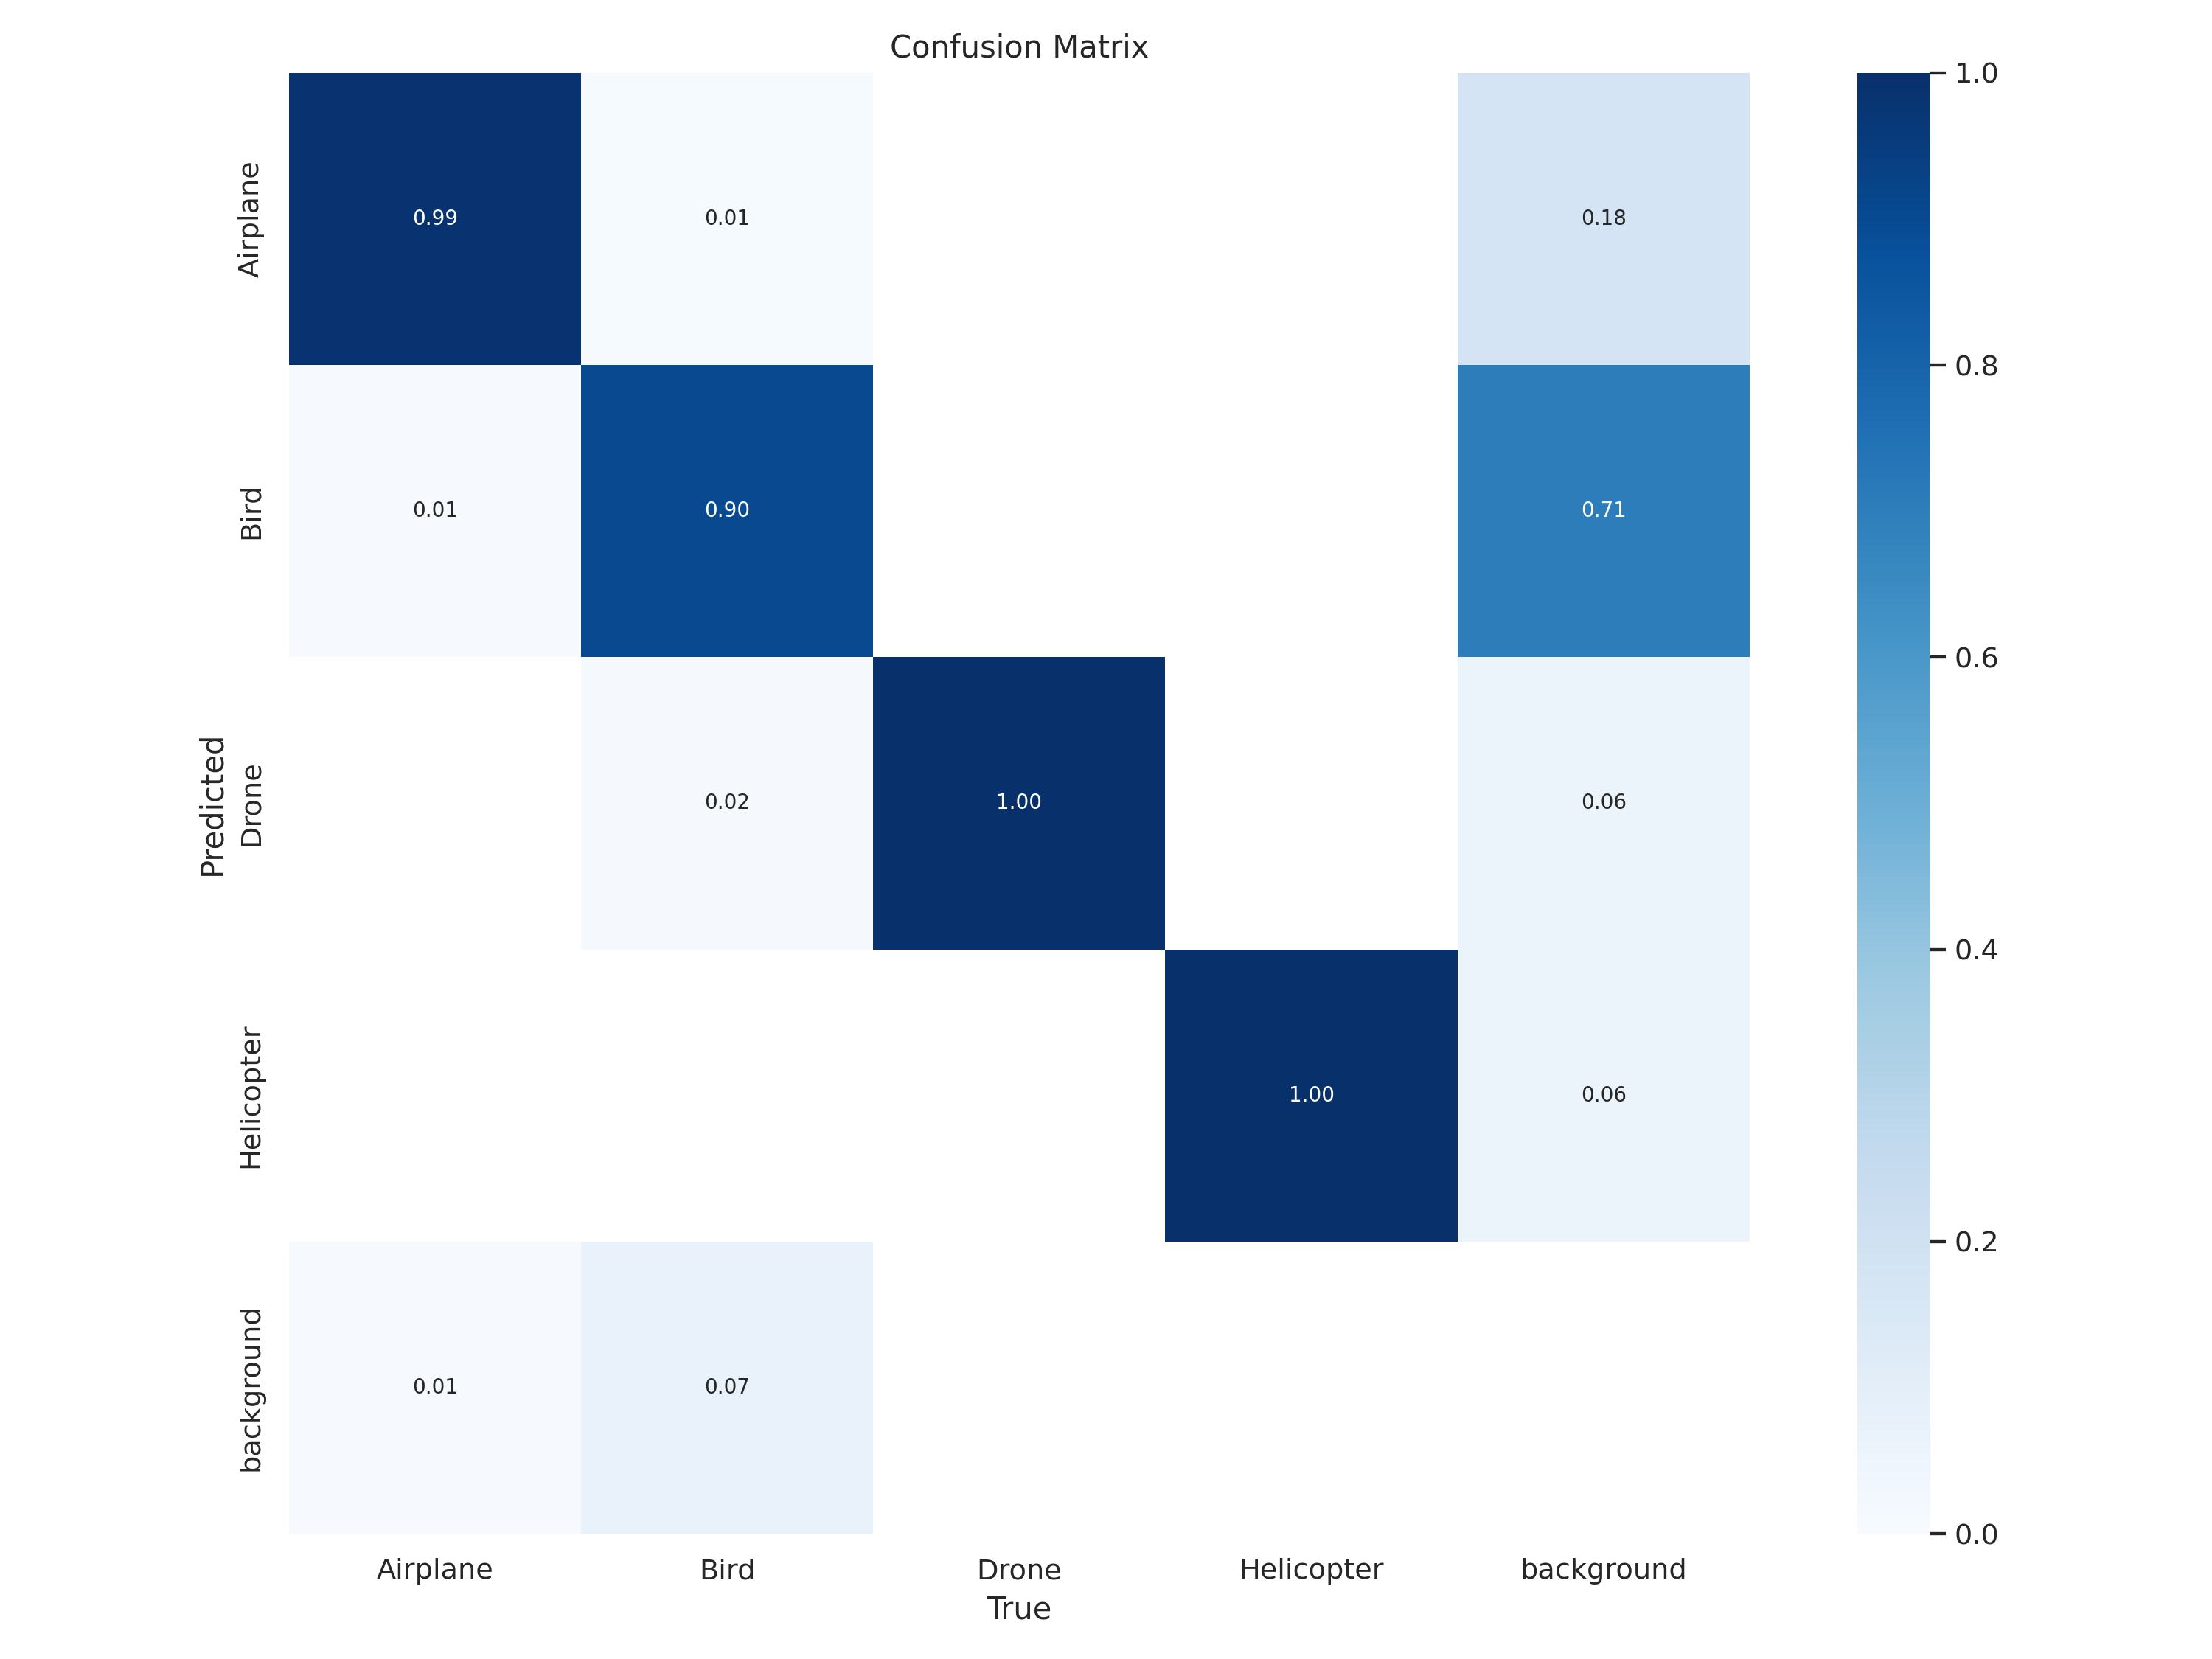

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


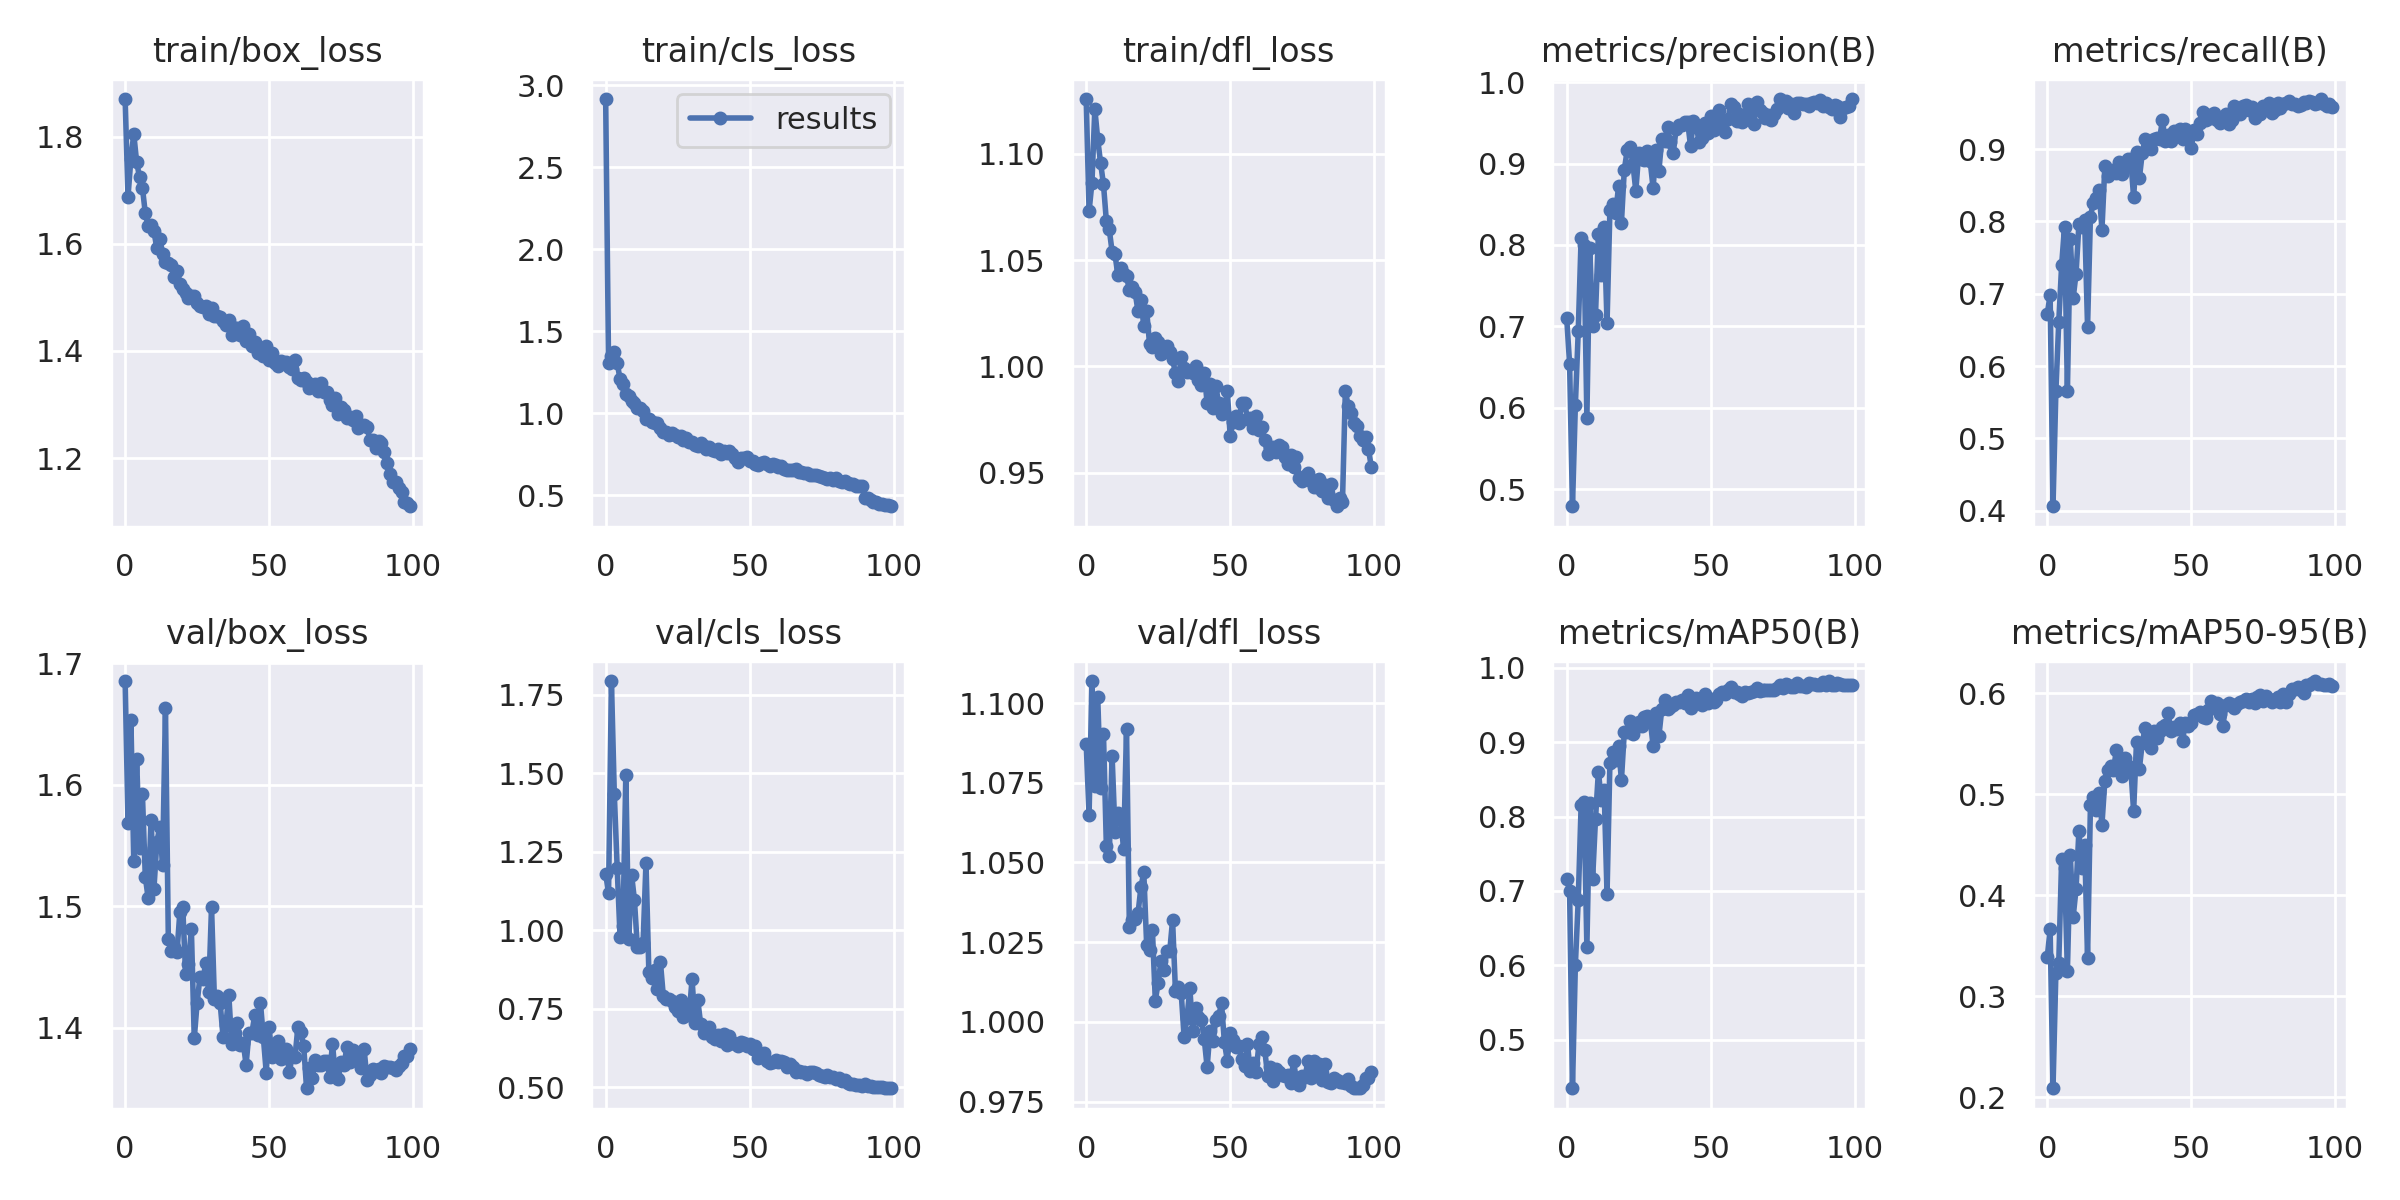

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

# Validation

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2024-01-10 13:10:55.486625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:10:55.486697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:10:55.488069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:10:56.528011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Final-Year-Project-5/valid/labels.cache..

In [ ]:
!ls {HOME}/runs/detect/val/

confusion_matrix.png  PR_curve.png	     val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png	      R_curve.png	     val_batch1_labels.jpg  val_batch2_pred.jpg
P_curve.png	      val_batch0_labels.jpg  val_batch1_pred.jpg


/content


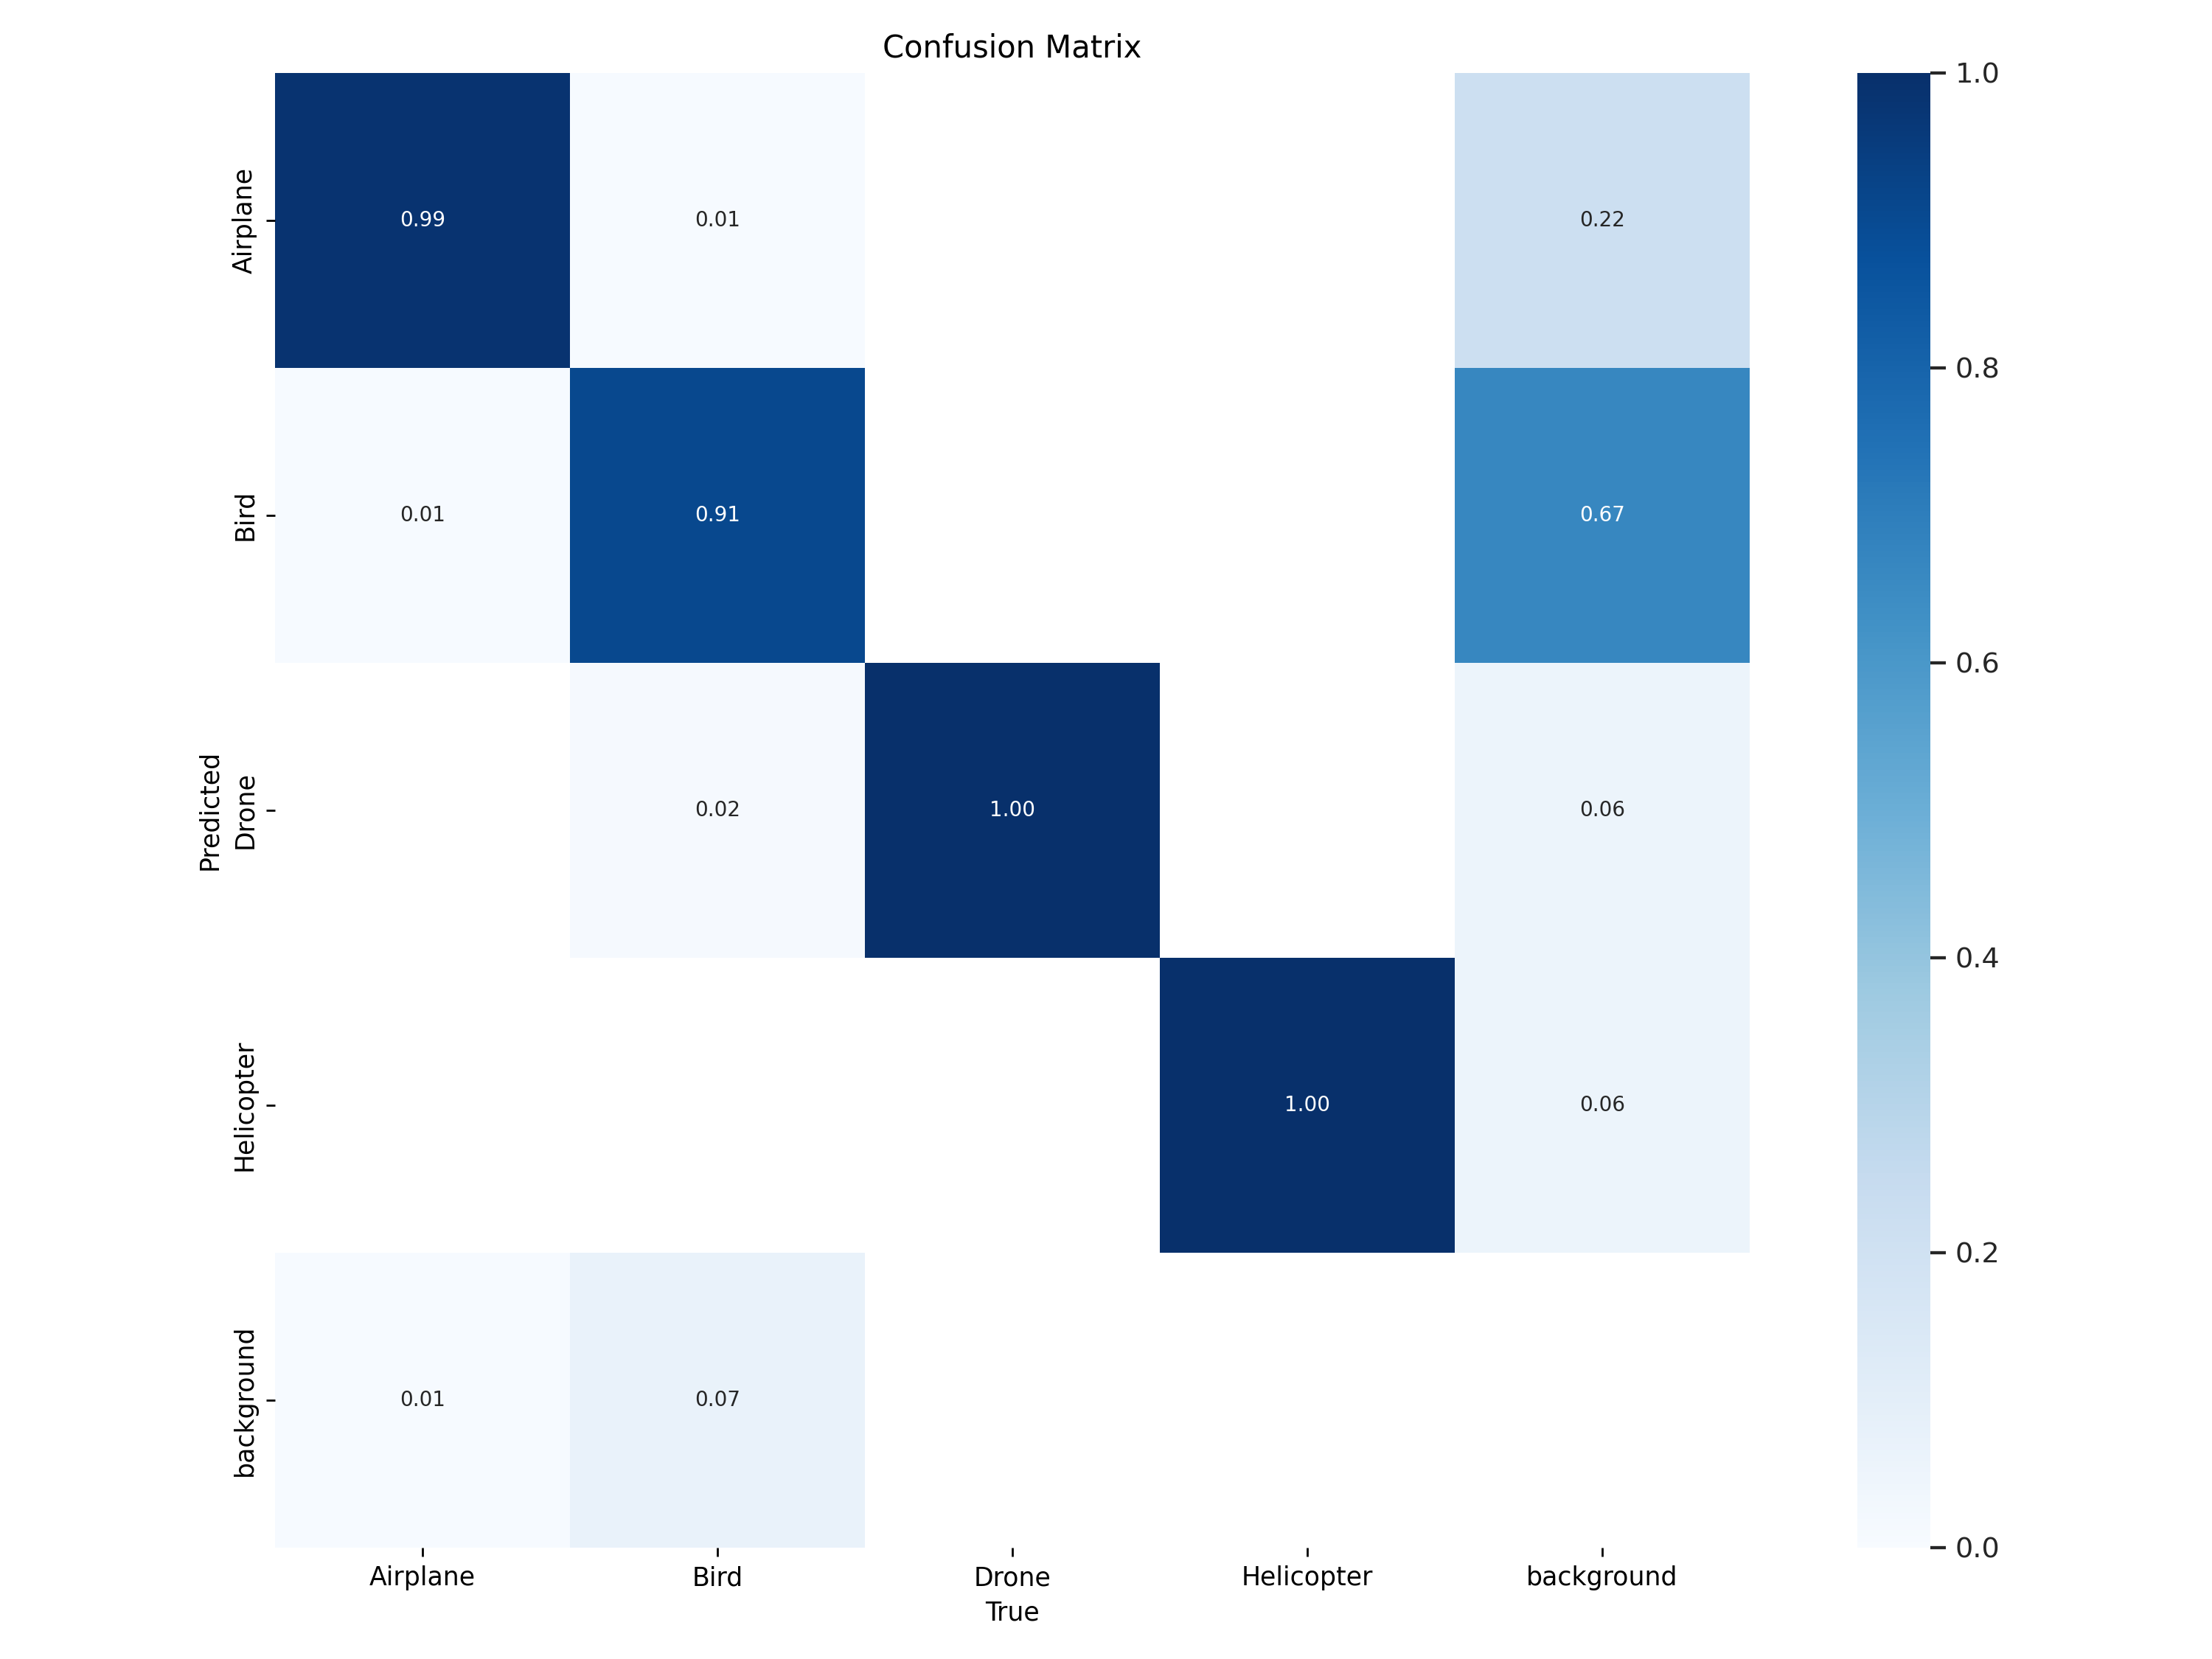

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=1000)

/content


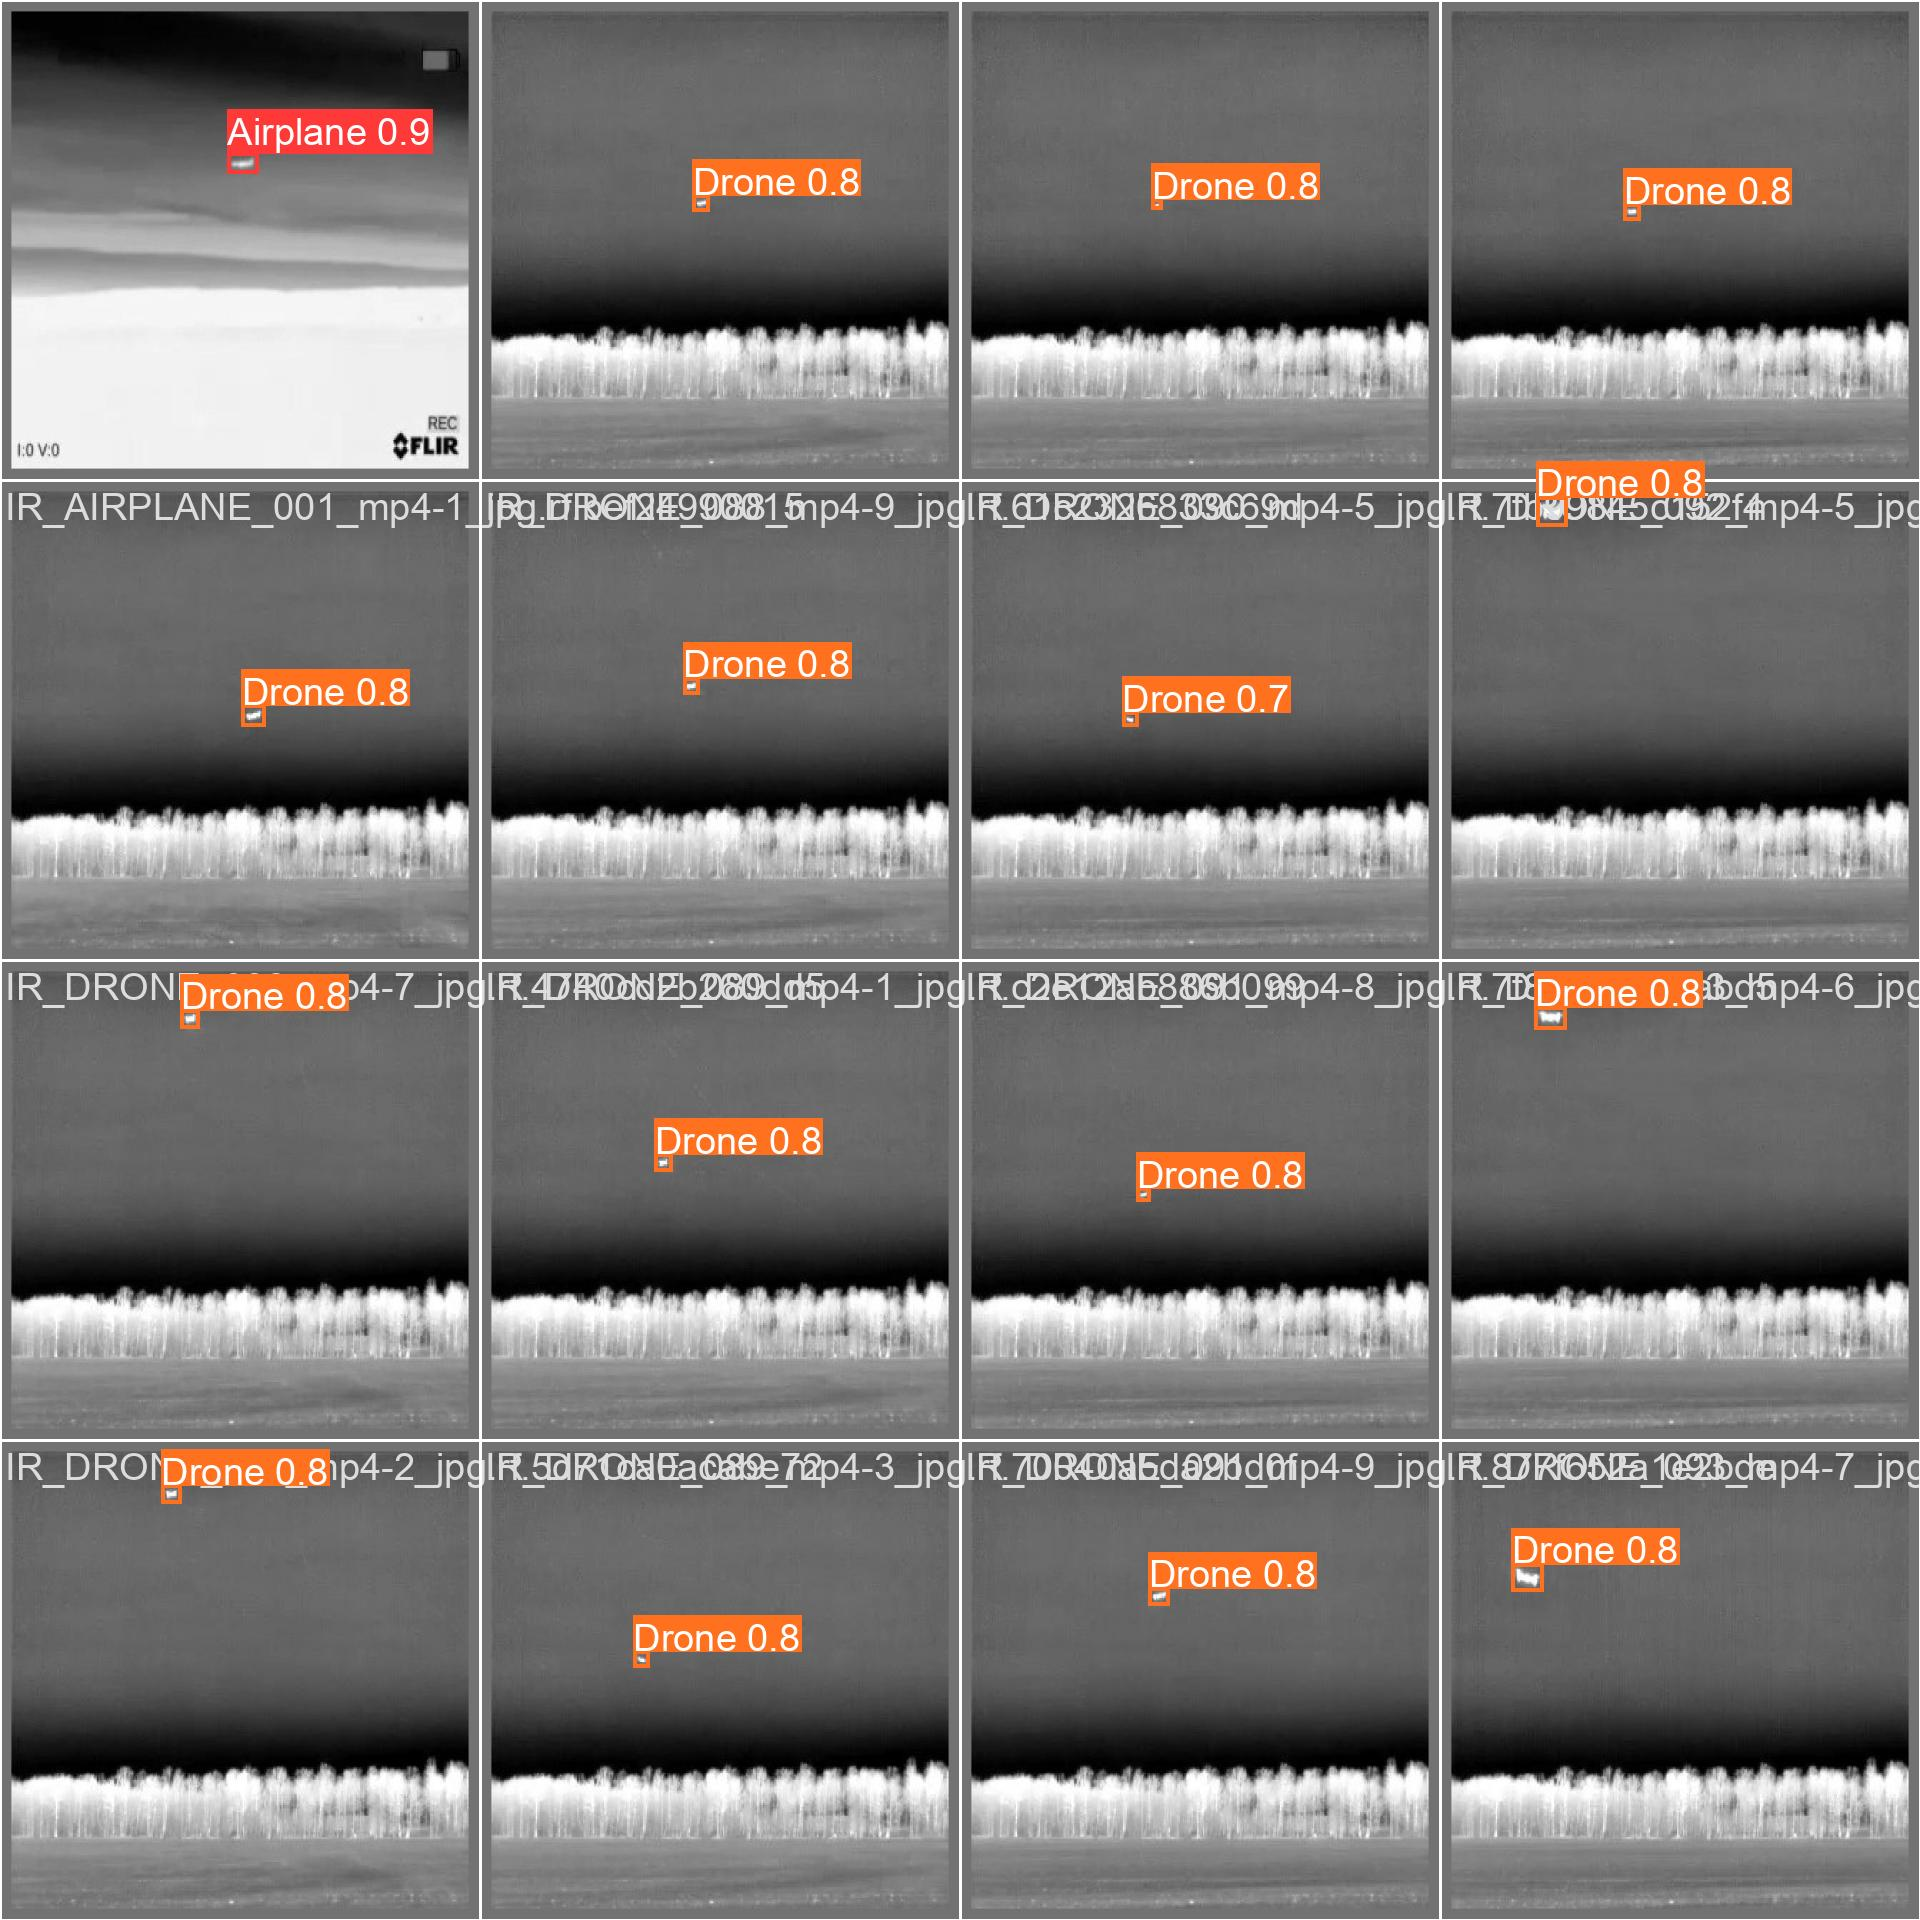

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=1000)

# Example of model prediction on validation batch
# Not used strictly for training

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the folder paths
source_folder1 = '/content/runs/detect/train/'
source_folder2 = '/content/runs/detect/val/'

# Specify the destination folder in Google Drive
destination_folder1 = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/train'
destination_folder2 = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/val'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder1, exist_ok=True)
os.makedirs(destination_folder2, exist_ok=True)

# Function to copy only files, not directories
def copy_files(src, dest):
    for filename in os.listdir(src):
        file_path = os.path.join(src, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dest)

# Copy files from source_folder1 to the destination folder
copy_files(source_folder1, destination_folder1)

# Copy files from source_folder2 to the destination folder
copy_files(source_folder2, destination_folder2)

# Provide feedback that the images have been saved
print(f"Files from '{source_folder1}' and '{source_folder2}' saved to '{destination_folder1}' and '{destination_folder2}' in Google Drive.")

Mounted at /content/gdrive
Files from '/content/runs/detect/train/' and '/content/runs/detect/val/' saved to '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/train' and '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/val' in Google Drive.


In [ ]:
# Specify the folder paths
sf = '/content/runs/detect/train/weights'

# Specify the destination folder in Google Drive
df = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/train/weights'

# Create the destination folder if it doesn't exist
os.makedirs(df, exist_ok=True)

# Function to copy only files, not directories
def copy_files(src, dest):
    for filename in os.listdir(src):
        file_path = os.path.join(src, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dest)

# Copy files from source_folder to the destination folder
copy_files(sf, df)

# Testing

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2024-01-10 13:14:08.288340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:14:08.288398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:14:08.289762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:14:09.314426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/400 /content/F

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/Result_Metrics/IR_YOLOv8m/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True save_txt=True

/content
2024-01-13 05:50:22.697560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 05:50:22.697608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 05:50:22.698827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 05:50:23.736141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/400 /content/F

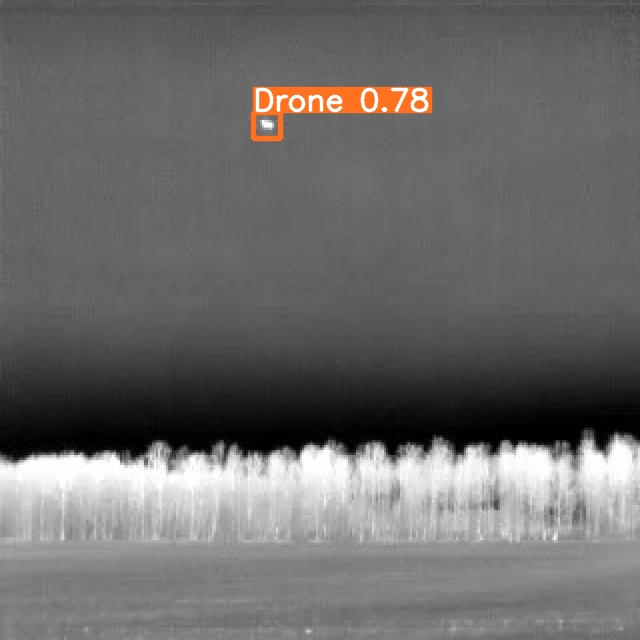

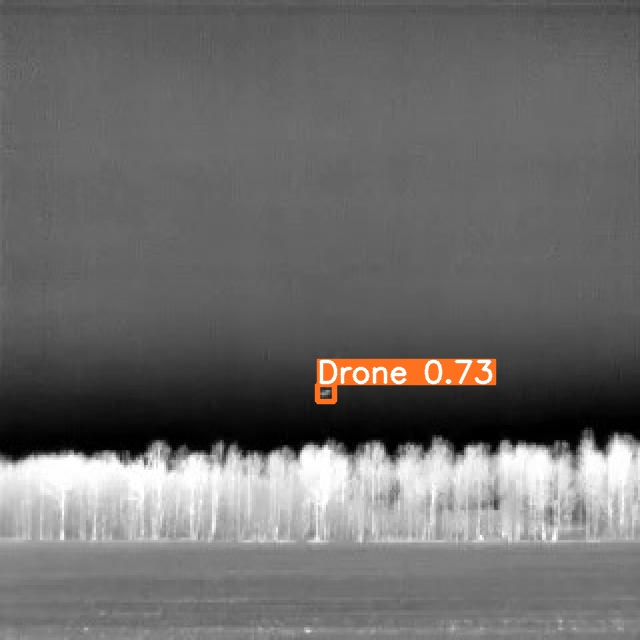

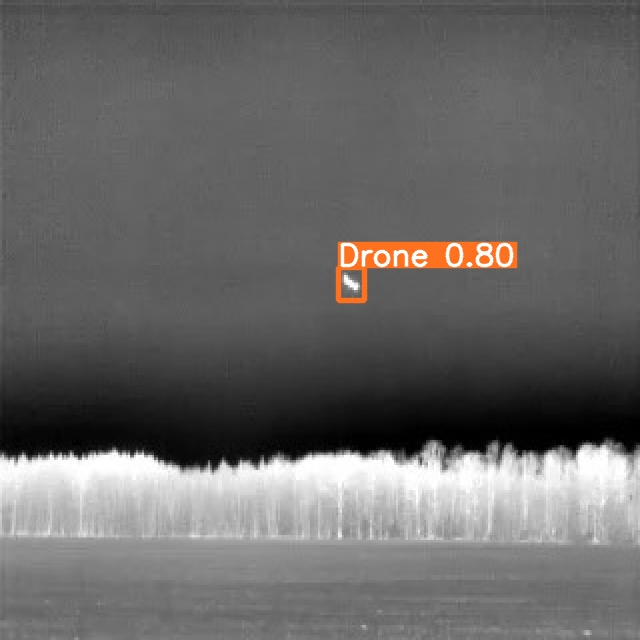

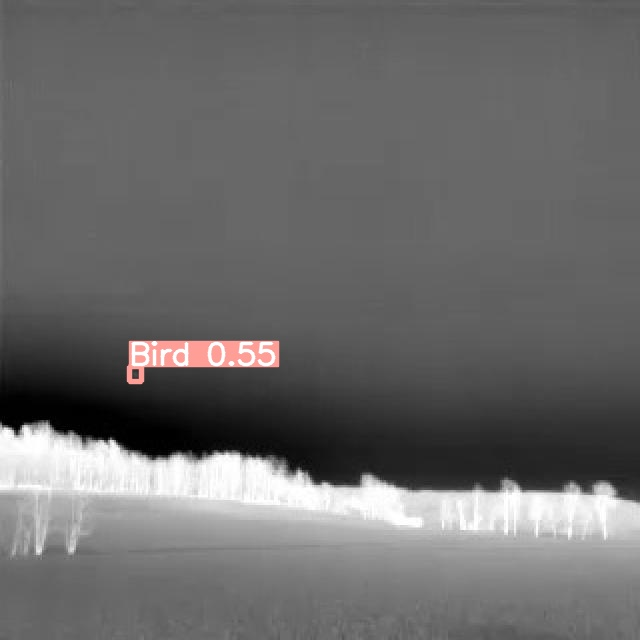

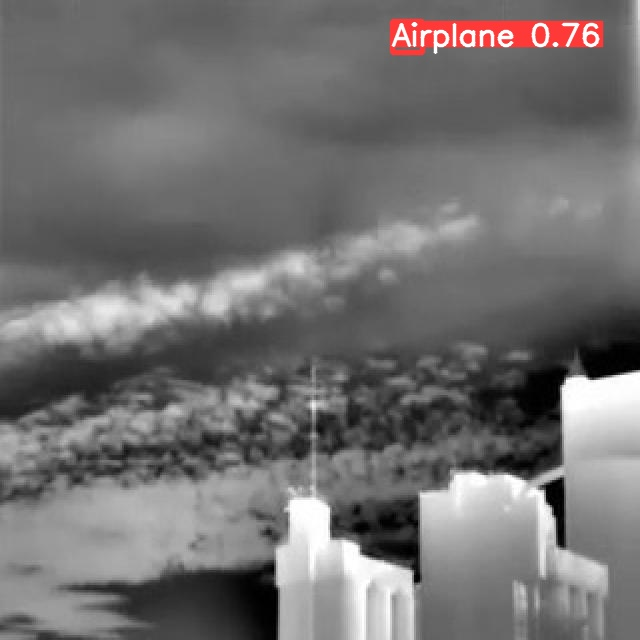

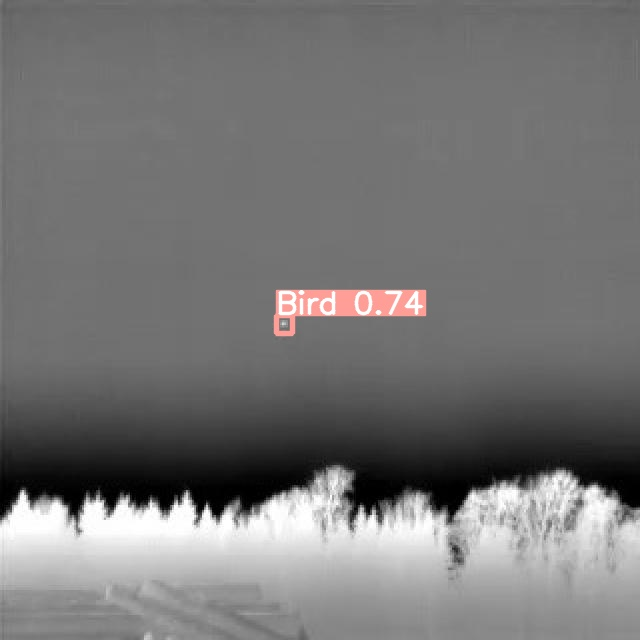

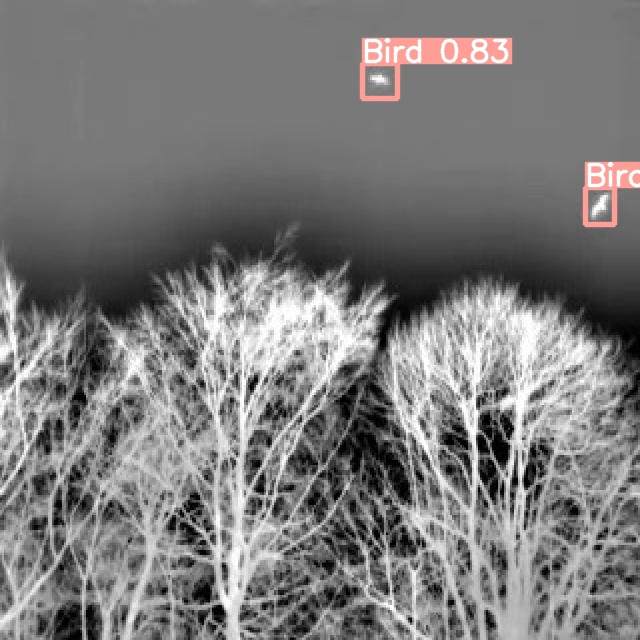

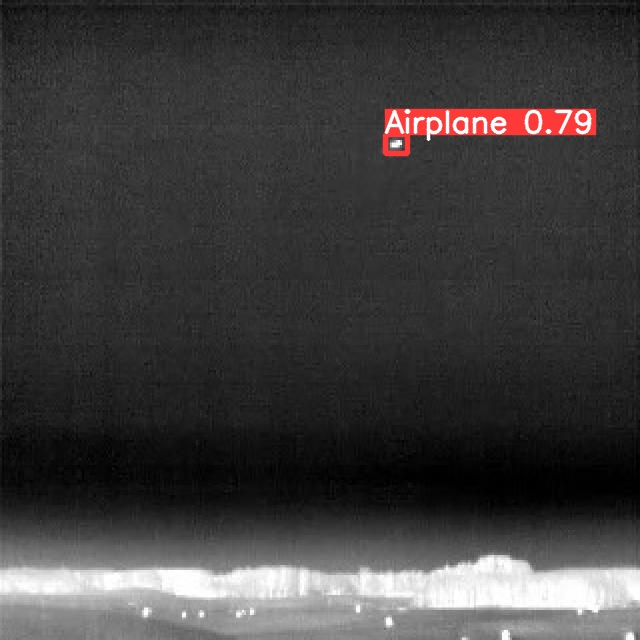

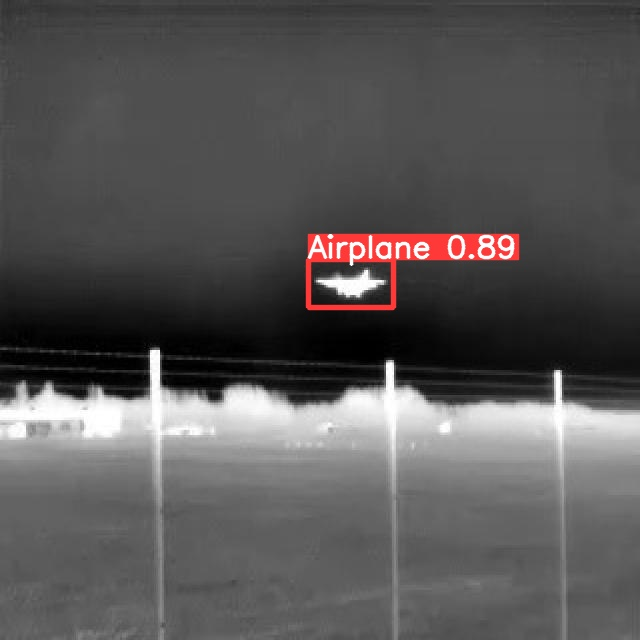

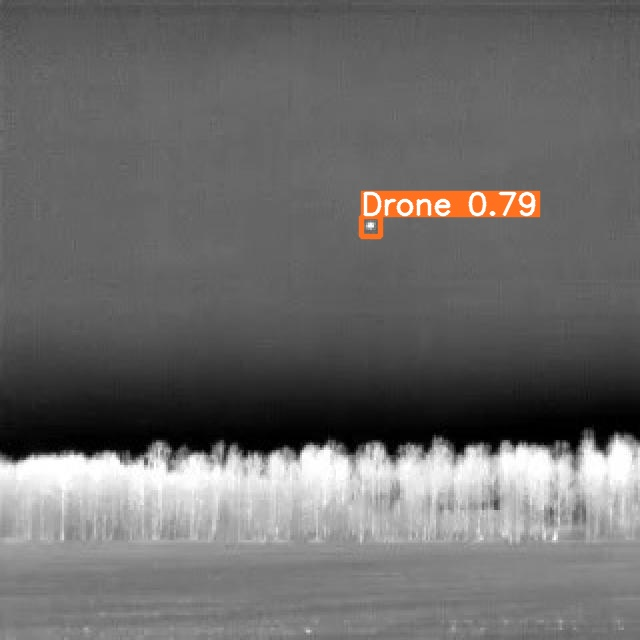

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import shutil
import os

# Specify the folder paths
source_folder3 = '/content/runs/detect/predict/'

# Specify the destination folder in Google Drive
destination_folder3 = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/predict'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder3, exist_ok=True)

# Function to copy only files, not directories
def copy_files(src, dest):
    for filename in os.listdir(src):
        file_path = os.path.join(src, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dest)

# Copy files from source_folder3 to the destination folder
copy_files(source_folder3, destination_folder3)

# Provide feedback that the images have been saved
print(f"Files from '{source_folder3}' saved to '{destination_folder3}' in Google Drive.")

Files from '/content/runs/detect/predict/' saved to '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/predict' in Google Drive.


In [ ]:
# Specify the folder paths
sf1 = '/content/runs/detect/predict/labels'

# Specify the destination folder in Google Drive
df1 = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/Result_Metrics/IR_YOLOv8m/predict/labels'

# Create the destination folder if it doesn't exist
os.makedirs(df1, exist_ok=True)

# Function to copy only files, not directories
def copy_files(src, dest):
    for filename in os.listdir(src):
        file_path = os.path.join(src, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dest)

# Copy files from source_folder to the destination folder
copy_files(sf1, df1)

# IoU Computation

IoU = (Area of Intersection) / (Area of Union)

In [ ]:
import os
import csv

# Function to read labels from a file
def read_labels(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Assuming each line in the file corresponds to a bounding box in YOLO format
    bounding_boxes = [list(map(float, line.split()[1:])) for line in lines]
    return bounding_boxes

# Function to calculate IoU
def get_iou(ground_truth, pred):
    # coordinates of the area of intersection.
    ix1 = max(ground_truth[0], pred[0])
    iy1 = max(ground_truth[1], pred[1])
    ix2 = min(ground_truth[2], pred[2])
    iy2 = min(ground_truth[3], pred[3])

    # Intersection height and width.
    i_height = max(iy2 - iy1 + 1, 0)
    i_width = max(ix2 - ix1 + 1, 0)

    area_of_intersection = i_height * i_width

    # Ground Truth dimensions.
    gt_height = ground_truth[3] - ground_truth[1] + 1
    gt_width = ground_truth[2] - ground_truth[0] + 1

    # Prediction dimensions.
    pd_height = pred[3] - pred[1] + 1
    pd_width = pred[2] - pred[0] + 1

    area_of_union = gt_height * gt_width + pd_height * pd_width - area_of_intersection

    iou = area_of_intersection / area_of_union

    return iou

# Path to ground truth labels and predicted labels
ground_truth_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/Dataset_IR/test/labels'
predicted_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/Result_Metrics/IR_YOLOv8m/predict/labels'

# Get a list of label filenames in both directories
ground_truth_files = os.listdir(ground_truth_path)
predicted_files = os.listdir(predicted_path)

# Output CSV file path
csv_output_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/IR_YOLOv8m_IoU.csv'

# Open CSV file for writing
with open(csv_output_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write header
    csv_writer.writerow(['Filename', 'IoU'])

    # Iterate through each pair of ground truth and predicted labels
    for file_name in ground_truth_files:
        if file_name in predicted_files:
            ground_truth_file = os.path.join(ground_truth_path, file_name)
            predicted_file = os.path.join(predicted_path, file_name)

            # Read ground truth and predicted bounding boxes
            ground_truth_boxes = read_labels(ground_truth_file)
            predicted_boxes = read_labels(predicted_file)

            # Calculate IoU for each pair
            for gt_box, pred_box in zip(ground_truth_boxes, predicted_boxes):
                iou = get_iou(gt_box, pred_box)

                # Write to CSV
                csv_writer.writerow([file_name, iou])

print(f"Results saved to {csv_output_path}")

Results saved to /content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/IR_YOLOv8m_IoU.csv


In [ ]:
import pandas as pd

# CSV file path
csv_path = '/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/2.0_V_IR/IR_YOLOv8m_IoU.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Extract class information from the filename
df['Class'] = df['Filename'].apply(lambda x: x.split('_')[1] if '_' in x else None)

# Filter data based on classes
drone_data = df[df['Class'] == 'DRONE']
airplane_data = df[df['Class'] == 'AIRPLANE']
helicopter_data = df[df['Class'] == 'HELICOPTER']
bird_data = df[df['Class'] == 'BIRD']

# Calculate average IoU for each class
avg_iou_drone = drone_data['IoU'].mean()
avg_iou_airplane = airplane_data['IoU'].mean()
avg_iou_helicopter = helicopter_data['IoU'].mean()
avg_iou_bird = bird_data['IoU'].mean()

# Print the results
print(f"Average IoU for DRONE: {avg_iou_drone:.3f}")
print(f"Average IoU for AIRPLANE: {avg_iou_airplane:.3f}")
print(f"Average IoU for HELICOPTER: {avg_iou_helicopter:.3f}")
print(f"Average IoU for BIRD: {avg_iou_bird:.3f}")

Average IoU for DRONE: 0.959
Average IoU for AIRPLANE: 0.974
Average IoU for HELICOPTER: 0.966
Average IoU for BIRD: 0.868


# Inference on videos

**IR VIDEOS**

In [ ]:
!ls /content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR

CLOSE_AIRPLANE.mp4  CLOSE_HELICOPTER.mp4  DISTANT_DRONE.mp4	  MEDIUM_BIRD.mp4
CLOSE_BIRD.mp4	    DISTANT_AIRPLANE.mp4  DISTANT_HELICOPTER.mp4  MEDIUM_DRONE.mp4
CLOSE_DRONE.mp4     DISTANT_BIRD.mp4	  MEDIUM_AIRPLANE.mp4	  MEDIUM_HELICOPTER.mp4


In [ ]:
#drone_close
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/CLOSE_DRONE.mp4 save=True

/content
2024-01-10 13:14:57.002491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:14:57.002555: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:14:57.003793: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:14:58.064252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/325) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict2/CLOSE_DRONE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/CLOSE_DRONE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#drone_medium
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/MEDIUM_DRONE.mp4 save=True

/content
2024-01-10 13:15:35.591946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:15:35.591996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:15:35.593225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:15:36.617282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/313) /con

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict3/MEDIUM_DRONE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/MEDIUM_DRONE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#drone_distant
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/DISTANT_DRONE.mp4 save=True

/content
2024-01-10 13:15:52.525021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:15:52.525078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:15:52.526341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:15:53.561476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/312) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict4/DISTANT_DRONE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/DISTANT_DRONE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#helicopter_close
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/CLOSE_HELICOPTER.mp4 save=True

/content
2024-01-10 13:16:09.180491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:16:09.180543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:16:09.181752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:16:10.199558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/305) /con

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict5/CLOSE_HELICOPTER.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/CLOSE_HELICOPTER.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#helicopter_medium
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/MEDIUM_HELICOPTER.mp4 save=True

/content
2024-01-10 13:16:26.306865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:16:26.306922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:16:26.308152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:16:27.343373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/302) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict6/MEDIUM_HELICOPTER.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/MEDIUM_HELICOPTER.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#helicopter_medium
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/DISTANT_HELICOPTER.mp4 save=True

/content
2024-01-10 13:16:43.359743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:16:43.359790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:16:43.360958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:16:44.388608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/307) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict7/DISTANT_HELICOPTER.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/DISTANT_HELICOPTER.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#airplane_close
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/CLOSE_AIRPLANE.mp4 save=True

/content
2024-01-10 13:17:00.050962: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:17:00.051029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:17:00.052234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:17:01.100722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/329) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict8/CLOSE_AIRPLANE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/CLOSE_AIRPLANE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#airplane_medium
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/MEDIUM_AIRPLANE.mp4 save=True

/content
2024-01-10 13:17:18.613879: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:17:18.613930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:17:18.615123: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:17:19.648623: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/313) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict9/MEDIUM_AIRPLANE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/MEDIUM_AIRPLANE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#airplane_distant
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/DISTANT_AIRPLANE.mp4 save=True

/content
2024-01-10 13:17:35.569141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:17:35.569193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:17:35.570428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:17:36.599109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/309) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict10/DISTANT_AIRPLANE.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/DISTANT_AIRPLANE.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#bird_close
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/CLOSE_BIRD.mp4 save=True

/content
2024-01-10 13:17:52.326135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:17:52.326197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:17:52.327356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:17:53.372548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/319) /con

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict11/CLOSE_BIRD.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/CLOSE_BIRD.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#bird_medium
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/MEDIUM_BIRD.mp4 save=True

/content
2024-01-10 13:18:10.041786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:18:10.041843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:18:10.043062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:18:11.078607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/307) /con

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict12/MEDIUM_BIRD.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/MEDIUM_BIRD.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#bird_distant
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/Video_IR/DISTANT_BIRD.mp4 save=True

/content
2024-01-10 13:18:27.383380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 13:18:27.383432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 13:18:27.384625: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 13:18:28.410100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/328) /content/gdrive/MyDrive/FYP_Drone/ObjectDetect

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict13/DISTANT_BIRD.mp4"} -vcodec libx264 {"/content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m/DISTANT_BIRD.mp4"}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# Check Results

In [ ]:
!ls /content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/train

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1704875030.cf2e2116f59c.2116.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch27630.jpg   val_batch2_labels.jpg
P_curve.png					    train_batch27631.jpg   val_batch2_pred.jpg
PR_curve.png					    train_batch27632.jpg   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


In [ ]:
!ls /content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_Metrics/IR_YOLOv8m/val

confusion_matrix.png  PR_curve.png	     val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png	      R_curve.png	     val_batch1_labels.jpg  val_batch2_pred.jpg
P_curve.png	      val_batch0_labels.jpg  val_batch1_pred.jpg


In [ ]:
!ls /content/gdrive/MyDrive/FYP_Drone/ObjectDetection/NEW_Result_IR/IR_YOLOv8m

CLOSE_AIRPLANE.mp4  CLOSE_HELICOPTER.mp4  DISTANT_DRONE.mp4	  MEDIUM_BIRD.mp4
CLOSE_BIRD.mp4	    DISTANT_AIRPLANE.mp4  DISTANT_HELICOPTER.mp4  MEDIUM_DRONE.mp4
CLOSE_DRONE.mp4     DISTANT_BIRD.mp4	  MEDIUM_AIRPLANE.mp4	  MEDIUM_HELICOPTER.mp4
